# Entity extraction
We produced structured data from the predicted region of each scanned card. Here we assess the proportion of entities in each column that correspond to their column type. We may be able to use NER to: 1) clean and refine entity types; and 2) prepare tabular data for entity linkage (from "strings" to "things")


In [1]:
import pandas as pd
import spacy
from spacy import displacy
import en_core_web_sm
from pandarallel import pandarallel

In [2]:
nlp = en_core_web_sm.load()

/home/slafia/.local/lib/python3.9/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [3]:
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 36 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
df = pd.read_csv('/nfs/turbo/isr-jtalexnonsen/extracts/flat_images_all.csv')
df.info()
# df = df.sample(n=20) # subset for testing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25738 entries, 0 to 25737
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  25738 non-null  object
 1   AGENCY     25622 non-null  object
 2   AMOUNT     23537 non-null  object
 3   ID         25438 non-null  object
 4   LOCATION   24431 non-null  object
 5   NAME       25551 non-null  object
 6   OTHER      291 non-null    object
 7   STATUS     25552 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


Mappings - expected entity type for each column
- AGENCY :: `ORG`
- AMOUNT :: `MONEY`
- LOCATION :: `LOC`
- NAME :: `PERSON`


Look up the description of a label in spaCy

In [5]:
spacy.explain('GPE')


'Countries, cities, states'

In [6]:
def extract_entities(text):
    """
    If a cell contains one or more entities, extract and store each as a tuple in a new column
    """
    doc = nlp(text)
    for ent in doc.ents:
        return ent.label_,ent.text


In [7]:
df['AGENCY_ORG'] = df['AGENCY'].astype(str).parallel_apply(extract_entities)


In [8]:
df['AMOUNT_MONEY'] = df['AMOUNT'].astype(str).parallel_apply(extract_entities)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
df['LOCATION_GPE'] = df['LOCATION'].astype(str).parallel_apply(extract_entities)

In [10]:
df['NAME_PERSON'] = df['NAME'].astype(str).parallel_apply(extract_entities)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

Compare the entity type of each record to the entity type of its column

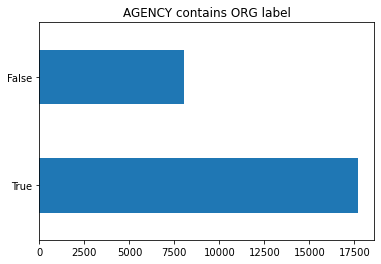

In [15]:
df['AGENCY_ORG'].astype(str).str.contains("ORG") \
.value_counts().plot(kind = 'barh', title='AGENCY contains ORG label');

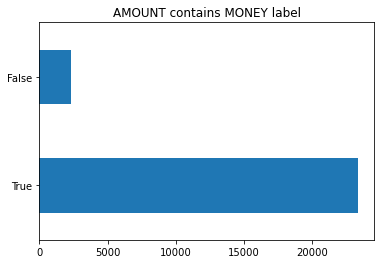

In [12]:
df['AMOUNT_MONEY'].astype(str).str.contains("MONEY") \
.value_counts().plot(kind = 'barh', title='AMOUNT contains MONEY label');

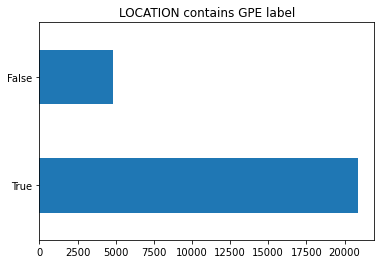

In [13]:
df['LOCATION_GPE'].astype(str).str.contains("GPE") \
.value_counts().plot(kind = 'barh', title='LOCATION contains GPE label');

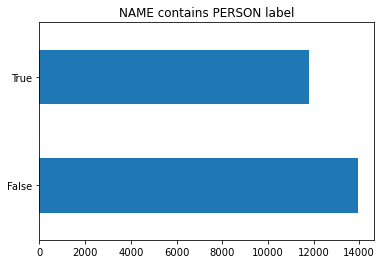

In [14]:
df['NAME_PERSON'].astype(str).str.contains("PERSON") \
.value_counts().plot(kind = 'barh', title='NAME contains PERSON label');


In [16]:
df.to_csv('/nfs/turbo/isr-jtalexnonsen/extracts/flat_images_all_NER.csv', index=False)